In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import keras
from tensorflow.python.client import device_lib

print(device_lib.list_local_devices())
import numpy as np
import pandas as pd
from collections import defaultdict
import re


import sys
import os

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils.np_utils import to_categorical

from keras.layers import Embedding
from keras.layers import Dense, Input, Flatten
from keras.layers import Conv1D, MaxPooling1D, Embedding, Dropout
from tensorflow.keras.layers import *
from keras.models import Model

MAX_SEQUENCE_LENGTH = 1000
MAX_NB_WORDS = 200000
EMBEDDING_DIM = 100
VALIDATION_SPLIT = 0.2

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 18243492772952261170
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 17135584448476663379
physical_device_desc: "device: XLA_CPU device"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 6754641550282523085
physical_device_desc: "device: XLA_GPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 11146783616
locality {
  bus_id: 1
  links {
  }
}
incarnation: 9320944372052008997
physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7"
]


In [ ]:
data_train = pd.read_csv('/content/gdrive/MyDrive/new/TanKianLong_1181300023/dataset/D2.csv')

In [ ]:
# Shuffle the data
from sklearn.utils import shuffle
data_train = shuffle(data_train)
data_train = data_train.reset_index(drop=True)

In [ ]:
data_train.head()

,title,text,subject,date,label
0,CALIFORNIA PROTESTS HEAT UP: Students Walk Out...,Thousands of students from Berkeley High Scho...,politics,"Nov 9, 2016",1
1,BREAKING: CLINTON CLEARED…Was This A Coordinat...,"650,000 Emails 9 Days 72,222 A Day 3000 A Hour...",politics,"Nov 6, 2016",1
2,(VIDEO) KRAUTHAMMER: FORMER CIA DEPUTY DIRECTO...,,politics,"May 12, 2015",1
3,Micheal Moore Demands MI Republican Gov. Be A...,Michael Moore has joined others in calling for...,News,"January 6, 2016",1
4,France's Macron to give Saudi Arabia extremist...,PARIS (Reuters) - French President Emmanuel Ma...,worldnews,"November 29, 2017",0


In [ ]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   label    44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.7+ MB


In [ ]:
# Convert to lowercase

data_train['text'] = data_train['text'].apply(lambda x: x.lower())
data_train.head()

,title,text,subject,date,label
0,CALIFORNIA PROTESTS HEAT UP: Students Walk Out...,thousands of students from berkeley high scho...,politics,"Nov 9, 2016",1
1,BREAKING: CLINTON CLEARED…Was This A Coordinat...,"650,000 emails 9 days 72,222 a day 3000 a hour...",politics,"Nov 6, 2016",1
2,(VIDEO) KRAUTHAMMER: FORMER CIA DEPUTY DIRECTO...,,politics,"May 12, 2015",1
3,Micheal Moore Demands MI Republican Gov. Be A...,michael moore has joined others in calling for...,News,"January 6, 2016",1
4,France's Macron to give Saudi Arabia extremist...,paris (reuters) - french president emmanuel ma...,worldnews,"November 29, 2017",0


In [ ]:
# Check
data_train.head()

,title,text,subject,date,label
0,CALIFORNIA PROTESTS HEAT UP: Students Walk Out...,thousands of students from berkeley high scho...,politics,"Nov 9, 2016",1
1,BREAKING: CLINTON CLEARED…Was This A Coordinat...,"650,000 emails 9 days 72,222 a day 3000 a hour...",politics,"Nov 6, 2016",1
2,(VIDEO) KRAUTHAMMER: FORMER CIA DEPUTY DIRECTO...,,politics,"May 12, 2015",1
3,Micheal Moore Demands MI Republican Gov. Be A...,michael moore has joined others in calling for...,News,"January 6, 2016",1
4,France's Macron to give Saudi Arabia extremist...,paris (reuters) - french president emmanuel ma...,worldnews,"November 29, 2017",0


In [ ]:
# Remove punctuation

import string

def punctuation_removal(text):
    all_list = [char for char in text if char not in string.punctuation]
    clean_str = ''.join(all_list)
    return clean_str

data_train['text'] = data_train['text'].apply(punctuation_removal)

In [ ]:
# Check
data_train.head()

,title,text,subject,date,label
0,CALIFORNIA PROTESTS HEAT UP: Students Walk Out...,thousands of students from berkeley high scho...,politics,"Nov 9, 2016",1
1,BREAKING: CLINTON CLEARED…Was This A Coordinat...,650000 emails 9 days 72222 a day 3000 a hour 5...,politics,"Nov 6, 2016",1
2,(VIDEO) KRAUTHAMMER: FORMER CIA DEPUTY DIRECTO...,,politics,"May 12, 2015",1
3,Micheal Moore Demands MI Republican Gov. Be A...,michael moore has joined others in calling for...,News,"January 6, 2016",1
4,France's Macron to give Saudi Arabia extremist...,paris reuters french president emmanuel macro...,worldnews,"November 29, 2017",0


In [ ]:
# Removing stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english','arabic')
stop.extend(["said", "reuters", "CNN", "would", "image", "via"])

data_train['text'] = data_train['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
data_train.head()

,title,text,subject,date,label
0,CALIFORNIA PROTESTS HEAT UP: Students Walk Out...,thousands students berkeley high school walked...,politics,"Nov 9, 2016",1
1,BREAKING: CLINTON CLEARED…Was This A Coordinat...,650000 emails 9 days 72222 day 3000 hour 50 mi...,politics,"Nov 6, 2016",1
2,(VIDEO) KRAUTHAMMER: FORMER CIA DEPUTY DIRECTO...,,politics,"May 12, 2015",1
3,Micheal Moore Demands MI Republican Gov. Be A...,michael moore joined others calling us attorne...,News,"January 6, 2016",1
4,France's Macron to give Saudi Arabia extremist...,paris french president emmanuel macron wednesd...,worldnews,"November 29, 2017",0


In [ ]:
def clean_str(string):
    """
    Cleaning of dataset
    """
    string = re.sub(r"\\", "", string)    
    string = re.sub(r"\'", "", string)    
    string = re.sub(r"\"", "", string)    
    return string.strip().lower()

In [ ]:
#print('What the raw input data looks like:')
#print(data_train[0:5])
texts = []
labels = []

for i in range(data_train.text.shape[0]):
    text2 = data_train.text[i]
    text =  str(text2)
    texts.append(text)
    labels.append(data_train.label[i])
    
tokenizer = Tokenizer(num_words=MAX_NB_WORDS)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 245228 unique tokens.


In [ ]:
# Pad input sequences
data = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)
labels = to_categorical(np.asarray(labels),num_classes = 2)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

Shape of data tensor: (44898, 1000)
Shape of label tensor: (44898, 2)


In [ ]:
# Train test validation Split
from sklearn.model_selection import train_test_split

indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]
x_train, x_test, y_train, y_test = train_test_split( data, labels, test_size=0.20, random_state=42)
x_test, x_val, y_test, y_val = train_test_split( x_test, y_test, test_size=0.50, random_state=42)
print('Size of train, validation, test:', len(y_train), len(y_val), len(y_test))

print('real & fake news in train,valt,test:')
print(y_train.sum(axis=0))
print(y_val.sum(axis=0))
print(y_test.sum(axis=0))

Size of train, validation, test: 35918 4490 4490
real & fake news in train,valt,test:
[17077. 18841.]
[2188. 2302.]
[2152. 2338.]


In [ ]:
from keras.models import Sequential
from keras.layers.convolutional import Conv3D
from keras.layers.convolutional_recurrent import ConvLSTM2D
from keras.layers.normalization import BatchNormalization
import numpy as np
from matplotlib import pyplot as plt
from keras.layers import Dense, Embedding, LSTM, GRU

%matplotlib inline

In [ ]:
GLOVE_DIR = "data" 
embeddings_index = {}
f = open(os.path.join(GLOVE_DIR, '/content/gdrive/My Drive/FYP/report/ALL/LSTM/glove.6B.100d.txt'), encoding="utf8") #The file that you had downloaded and moved from local session to drive.

In [ ]:
for line in f:
    values = line.split()
    #print(values[1:])
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Total %s word vectors in Glove.' % len(embeddings_index))

embedding_matrix = np.random.random((len(word_index) + 1, EMBEDDING_DIM))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector
        
embedding_layer = Embedding(len(word_index) + 1,
                            EMBEDDING_DIM,
                            weights=[embedding_matrix],
                            input_length=MAX_SEQUENCE_LENGTH)


Total 400000 word vectors in Glove.


In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras import regularizers

LSTM

In [ ]:
embedding_vecor_length = 32
model = Sequential()
model.add(Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32'))
model.add(Embedding(len(word_index) + 1, EMBEDDING_DIM, weights = [embedding_matrix], input_length = MAX_SEQUENCE_LENGTH, trainable=False, name = 'embeddings'))
model.add(Dropout(0.3))
model.add(LSTM(100))  # one LSTM Layer with 100 neurons
model.add(Dense(2,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embeddings (Embedding)       (None, 1000, 100)         24522900  
_________________________________________________________________
dropout_1 (Dropout)          (None, 1000, 100)         0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 202       
Total params: 24,603,502
Trainable params: 80,602
Non-trainable params: 24,522,900
_________________________________________________________________
None


In [ ]:
callbacks = [EarlyStopping(monitor='val_loss', patience=2),
             ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True)]

In [ ]:
history = model.fit(x_train, 
                     y_train, 
                     epochs=10, 
                     batch_size=128, 
                     validation_data=(x_val, y_val))

Epoch 1/10
281/281 [==============================] - 53s 190ms/step - loss: 0.2813 - accuracy: 0.8842 - val_loss: 0.1738 - val_accuracy: 0.9381
Epoch 2/10
281/281 [==============================] - 53s 188ms/step - loss: 0.2074 - accuracy: 0.9203 - val_loss: 0.1816 - val_accuracy: 0.9296
Epoch 3/10
281/281 [==============================] - 53s 188ms/step - loss: 0.1407 - accuracy: 0.9462 - val_loss: 0.0938 - val_accuracy: 0.9666
Epoch 4/10
281/281 [==============================] - 53s 188ms/step - loss: 0.1157 - accuracy: 0.9588 - val_loss: 0.0720 - val_accuracy: 0.9737
Epoch 5/10
281/281 [==============================] - 53s 188ms/step - loss: 0.0988 - accuracy: 0.9654 - val_loss: 0.0662 - val_accuracy: 0.9777
Epoch 6/10
281/281 [==============================] - 53s 188ms/step - loss: 0.0723 - accuracy: 0.9747 - val_loss: 0.0732 - val_accuracy: 0.9753
Epoch 7/10
281/281 [==============================] - 53s 188ms/step - loss: 0.0621 - accuracy: 0.9779 - val_loss: 0.0527 - val_ac

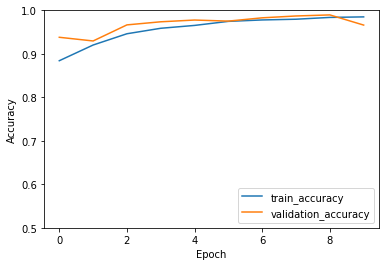

In [ ]:
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label = 'validation_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

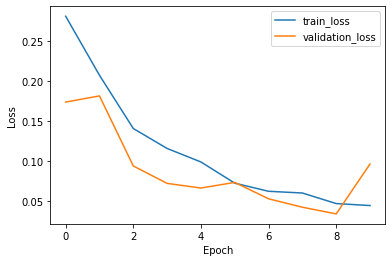

In [ ]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='validation_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
y_pred = model.predict_classes(x_val)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
test_preds = model.predict(x_test)
test_preds = np.round(test_preds)
correct_predictions = float(sum(test_preds == y_test)[0])
print("Correct predictions:", correct_predictions)
print("Total number of test examples:", len(y_test))
print("Accuracy of model1: ", correct_predictions/float(len(y_test)))

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Correct predictions: 4331.0
Total number of test examples: 4490
Accuracy of model1:  0.9645879732739421


In [ ]:
y_test[1]

array([1., 0.], dtype=float32)

In [ ]:
import numpy as np
rounded_labels=np.argmax(y_test, axis=1)

In [ ]:
rounded_labels

array([1, 0, 1, ..., 0, 1, 0])

In [ ]:
from sklearn.metrics import classification_report
y_pred = model.predict_classes(x_test)

In [ ]:
print(classification_report(rounded_labels, y_pred, target_names=['negative','positive']))

              precision    recall  f1-score   support

    negative       0.96      0.96      0.96      2152
    positive       0.97      0.96      0.96      2338

    accuracy                           0.96      4490
   macro avg       0.96      0.96      0.96      4490
weighted avg       0.96      0.96      0.96      4490

